In [1]:
## Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Embeded Datasets
from sklearn import datasets

## For shuffling the Dataset
from sklearn import utils

## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict

## Algorithms
from sklearn.svm import LinearSVC, SVC     ## Classification Problems
from sklearn.svm import LinearSVR, SVR     ## Regression Problems

## Metric
from sklearn.metrics import accuracy_score, r2_score

## `Classification`

### `Loading the iris Dataset`

In [2]:
## Load the iris dataset from the embeded datasets provided in sklearn
iris_dataset = datasets.load_iris()

## check the dataset by checking its keys
iris_dataset.keys()           ## each key has data or information

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
## Let's get all together and create a DF
## I will do it in very fast way and it is my preferable one, but there are many ways as we learned together 

df_iris = pd.DataFrame(np.c_[iris_dataset['data'], iris_dataset['target'].reshape(-1, 1)], 
                       columns=iris_dataset['feature_names']+['target'])

## check the head
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
## Let's shuffle the Dataset as you see that the target is ordered (0 then 1 then 2) --> Classification problem
## You can use function (sample) provided in pandas or use (shuffle) in sklearn
df_iris = utils.shuffle(df_iris, random_state=42)   ## shuffle and overwrite

## check the head again
df_iris.head()    ## OK

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
73,6.1,2.8,4.7,1.2,1.0
18,5.7,3.8,1.7,0.3,0.0
118,7.7,2.6,6.9,2.3,2.0
78,6.0,2.9,4.5,1.5,1.0
76,6.8,2.8,4.8,1.4,1.0


### `Exploratory Data Analysis (EDA)`

In [5]:
## Do it Yourself

### `Preprocessing`
`The Dataset is very small, It is a Toy example, I will not split the data`

In [6]:
### Split the Dataset to Features and Target
X = df_iris.drop(columns=['target'], axis=1)
y = df_iris['target']

In [7]:
## Let's impute (although there is no nulls) and standardize the Dataset ---> All in Pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
                              ]
                       )

X_train = num_pipeline.fit_transform(X)
y_train = y.copy()   ## doesn't matter

### `Building a ML Model`
* ` ---> Classification Problem`

### `Linear SVM`

In [8]:
## Build Linear SVM
lin_svc_clf = LinearSVC(C=1, loss='hinge', max_iter=10000)          ## It is equal to ---> SVC(C=1, kernel='linear')
lin_svc_clf.fit(X_train, y_train)

LinearSVC(C=1, loss='hinge', max_iter=10000)

In [9]:
## Prediction
y_pred = lin_svc_clf.predict(X_train)

## accuracy score
print('Accuracy Scores -- ', accuracy_score(y_train, y_pred))

print('--'*30)

## If you want to use cross validation
scores_acc_linsvc = cross_val_score(estimator=lin_svc_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print('Accuracy Scores using cross validation --- \n ', scores_acc_linsvc)

Accuracy Scores --  0.9266666666666666
------------------------------------------------------------
Accuracy Scores using cross validation --- 
  [0.96666667 0.86666667 0.83333333 0.96666667 0.9       ]


In [10]:
## prediction using cross validation predict
y_pred_linsvc = cross_val_predict(estimator=lin_svc_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

In [11]:
## If you want to get scores
y_scores_linsvc = cross_val_predict(estimator=lin_svc_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='decision_function')

In [12]:
## And so on you can do what we learn ------ take your time playing

### `SVM`
`Using SVM for Classification but still Linear`

In [13]:
## SVC linear
svc_clf = SVC(C=1, kernel='linear')  ## Using Linear Kernel
svc_clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [14]:
## Prediction
y_pred_linear = svc_clf.predict(X_train)
## accuracy score
print('Accuracy Scores -- ', accuracy_score(y_train, y_pred_linear))

print('--'*30)

## If you want to use cross validation
scores_acc_linear = cross_val_score(estimator=svc_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print('Accuracy Scores using cross validation --- \n ', scores_acc_linear)

Accuracy Scores --  0.9666666666666667
------------------------------------------------------------
Accuracy Scores using cross validation --- 
  [0.96666667 0.96666667 0.9        0.93333333 1.        ]


In [15]:
## prediction using cross validation predict
y_pred_linear = cross_val_predict(estimator=svc_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

## If you want to get scores
y_scores_linsvc = cross_val_predict(estimator=lin_svc_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='decision_function')

In [16]:
## And so on you can do what we learn ------ take your time playing

### `Loading moon dataset`

In [17]:
## Load another dataset -- moons dataset 
moons_data = datasets.make_moons(n_samples=1000, noise=0.2, shuffle=True, random_state=42) ## incresase noise -- more complex

## Features is the first 2D array, and the second vector is the target
X_train_moons = moons_data[0]
y_train_moons = moons_data[1]

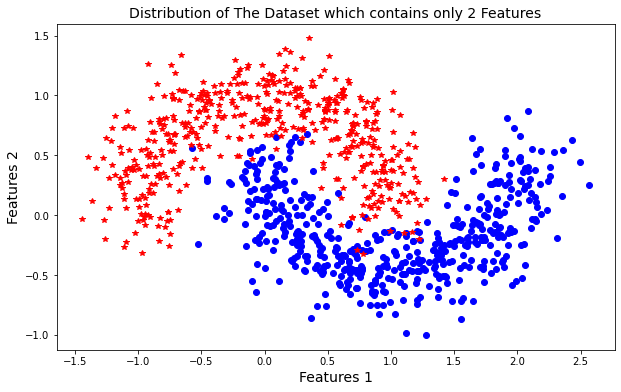

In [18]:
## Some EDA ---> Do it yourself and try SVM on another Dataset, but not big one
plt.figure(figsize=(10, 6))
plt.plot(X_train_moons[y_train_moons==1][:, 0], X_train_moons[y_train_moons==1][:, 1], 'bo', label='1')
plt.plot(X_train_moons[y_train_moons==0][:, 0], X_train_moons[y_train_moons==0][:, 1], 'r*', label='0')
plt.title('Distribution of The Dataset which contains only 2 Features', fontsize=14, c='k')
plt.xlabel('Features 1', fontsize=14, c='k')
plt.ylabel('Features 2', fontsize=14, c='k')
plt.show()

In [19]:
## Create a pipeline for imputing and scaling
feat_pipeline = Pipeline(steps=[
                                ('imputer', SimpleImputer()),
                                ('scaler', StandardScaler())
                               ]
                        )

## fit and transform
X_train_2 = feat_pipeline.fit_transform(X_train_moons)

## Label as it is --, just copying to not overwrite and make the same name
y_train_2 = y_train_moons.copy()

### `SVM using polynomial kernel`

In [20]:
## Build SVM using polynomial kernel with degree 
## The hyperparameter coef0 controls how much the model is influenced by highdegree polynomials vs. low-degree polynomials.
svc_clf_poly = SVC(C=5, kernel='poly', degree=5, coef0=1)   ## Need a lot of Tuning
svc_clf_poly.fit(X_train_2, y_train_2)   

## Note: (degree & coef0) Hyperparameters work only when kernel is 'poly'
## Note: The same things can be done in Regression

SVC(C=5, coef0=1, degree=5, kernel='poly')

In [21]:
## Prediction
y_pred_svc_poly = svc_clf_poly.predict(X_train_2)
print('Accuracy Score using Polynmial Kernel --- ', accuracy_score(y_train_2, y_pred_svc_poly))

Accuracy Score using Polynmial Kernel ---  0.977


In [22]:
## You can use cross validation , get Predictions, get other metrics, get scores, get all we discussed before
## Take your time playing with code

### `SVM using RBF kernel`
* > `RBF stands for (Radian Basis Function)`

In [23]:
## Build SVM using RBF kernel with gamma
svc_clf_rbf = SVC(C=5, kernel='rbf', gamma=0.001)   ## Need a lot of Tuning
svc_clf_rbf.fit(X_train_2, y_train_2)   

## Note: (gamma) Hyperparameter workes only when kernel is 'rbf'
## Note: The same things can be done in Regression

SVC(C=5, gamma=0.001)

In [24]:
## Prediction
y_pred_svc_rbf = svc_clf_rbf.predict(X_train_2)
print('Accuracy Score using RBF Kernel --- ', accuracy_score(y_train_2, y_pred_svc_rbf))

Accuracy Score using RBF Kernel ---  0.863


In [25]:
## You can use cross validation , get Predictions, get other metrics, get scores, get all we discussed before
## Take your time playing with code

## `Regression`

In [26]:
## Loading the Dataset for Regression
diabet_dataset = datasets.load_diabetes()

## To DataFrame
df_diabet = pd.DataFrame(np.c_[diabet_dataset['data'], diabet_dataset['target'].reshape(-1, 1)], 
                         columns=diabet_dataset['feature_names']+['target'])

df_diabet.head()  

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [27]:
## Slice to Features and Traget
X_diabet = df_diabet.drop(columns=['target'], axis=1) 
y_diabet = df_diabet['target']


## Pipeline
diabet_pipeline = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy='median')),
                                    ('scaler', StandardScaler())
                                ]
                          )

## Fit
X_train_3 = diabet_pipeline.fit_transform(X_diabet)
y_train_3 = y_diabet.copy()

### `Building ML Model`
* > `Regression problem`

### `Linear SVR`

In [28]:
## Using Linear SVM
lin_svr_reg = LinearSVR(epsilon=1.0, C=2)   ## Euqal to use --> SVR(kernel='linear')
lin_svr_reg.fit(X_train_3, y_train_3)        ## fit

LinearSVR(C=2, epsilon=1.0)

In [29]:
## Prediction
y_pred = lin_svr_reg.predict(X_train_3)

## accuracy score
print('R2 Score -- ', r2_score(y_train_3, y_pred))

print('--'*30)

## If you want to use cross validation
scores_r2_linsvr = cross_val_score(estimator=lin_svr_reg, X=X_train_3, y=y_train_3, cv=5, n_jobs=-1, scoring='r2')
print('R2 Score using cross validation --- \n ', scores_r2_linsvr)

R2 Score --  0.4817530033420966
------------------------------------------------------------
R2 Score using cross validation --- 
  [0.39509821 0.41432781 0.46536807 0.34421716 0.47527987]


In [30]:
## Complete what you want. take your time palying with code

### `Using Kernels for Regresion`

In [31]:
## You can use kernels (Linear, Polynomial, RBF, ....)
poly_svr_reg = SVR(kernel='poly', degree=2, coef0=1.0, C=2)
poly_svr_reg.fit(X_train_3, y_train_3)        ## fit

SVR(C=2, coef0=1.0, degree=2, kernel='poly')

In [32]:
## Prediction
y_pred = poly_svr_reg.predict(X_train_3)

## accuracy score
print('R2 Score -- ', r2_score(y_train_3, y_pred))

print('--'*30)

## If you want to use cross validation
scores_r2_linsvr = cross_val_score(estimator=poly_svr_reg, X=X_train_3, y=y_train_3, cv=5, n_jobs=-1, scoring='r2')
print('R2 Score using cross validation --- \n ', scores_r2_linsvr)

R2 Score --  0.5232558717993397
------------------------------------------------------------
R2 Score using cross validation --- 
  [0.4009627  0.516024   0.49704909 0.43550665 0.51684849]


> `Take your time playing with code, trying different methods`

### `More Details Later`